In [42]:
import numpy as np
import pandas as pd
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [3]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [4]:
!gdown 1cz1cCOs80cPjBxrhlFTtzFXL159GXWFp

Downloading...
From: https://drive.google.com/uc?id=1cz1cCOs80cPjBxrhlFTtzFXL159GXWFp
To: /content/data5.csv
100% 430M/430M [00:06<00:00, 67.5MB/s]


In [5]:
data5_2 = pd.read_csv("data5.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists

In [6]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,5
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,5
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,5
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,5


In [7]:
X_oneLstPerRow = get_words(data5_2,5)

In [8]:
y = data5_2['label']

In [9]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_oneLstPerRow, y, test_size=0.2,stratify=y, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5,stratify=y_val_test, random_state=1) 

In [10]:
np_train  = pd.DataFrame(X_train).values
np_val = pd.DataFrame(X_val).values
np_test  = pd.DataFrame(X_test).values

In [11]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
y_test_categorical = to_categorical(y_test)

Make the embeddding layer fixed and try different activation functions

Sigmoid Activation Function




In [ ]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 50, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(1, activation='sigmoid'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [ ]:
cnn_trytext.fit(np_train, y_train, validation_data  = (np_val, y_val), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 22s 9ms/step - loss: 0.3471 - accuracy: 0.7729 - val_loss: 0.3431 - val_accuracy: 0.7711
Epoch 2/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3295 - accuracy: 0.7788 - val_loss: 0.3462 - val_accuracy: 0.7684
Epoch 3/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3259 - accuracy: 0.7818 - val_loss: 0.3473 - val_accuracy: 0.7743
Epoch 4/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3239 - accuracy: 0.7822 - val_loss: 0.3451 - val_accuracy: 0.7693
Epoch 5/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3225 - accuracy: 0.7822 - val_loss: 0.3367 - val_accuracy: 0.7704
Epoch 6/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3218 - accuracy: 0.7834 - val_loss: 0.3364 - val_accuracy: 0.7753
Epoch 7/100
1538/1538 [==============================] - 15s 10ms/step - loss: 0.3210 - accuracy: 0.7841 - val_loss: 0.3354 

In [ ]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [ ]:
np_preds   = (preds>=0.5).astype(int)

In [ ]:
f1_score(y_test, np_preds)

0.8125920213138891

In [ ]:
accuracy_score(y_test, np_preds)

0.7827535760728218

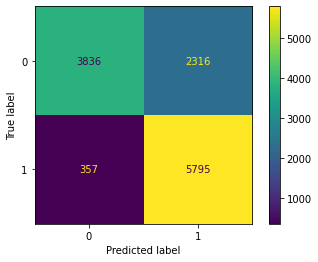

In [ ]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

Softmax Activation Function (Binary CrossEntropy)

In [ ]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 50, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(2, activation='softmax'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [ ]:
cnn_trytext.fit(np_train, y_train_categorical, validation_data  = (np_val, y_val_categorical), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 15s 9ms/step - loss: 0.3517 - accuracy: 0.7735 - val_loss: 0.3471 - val_accuracy: 0.7703
Epoch 2/100
1538/1538 [==============================] - 15s 10ms/step - loss: 0.3313 - accuracy: 0.7803 - val_loss: 0.3435 - val_accuracy: 0.7696
Epoch 3/100
1538/1538 [==============================] - 15s 10ms/step - loss: 0.3277 - accuracy: 0.7815 - val_loss: 0.3385 - val_accuracy: 0.7696
Epoch 4/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3253 - accuracy: 0.7822 - val_loss: 0.3403 - val_accuracy: 0.7695
Epoch 5/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3238 - accuracy: 0.7830 - val_loss: 0.3404 - val_accuracy: 0.7715
Epoch 6/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3228 - accuracy: 0.7830 - val_loss: 0.3511 - val_accuracy: 0.7727
Epoch 7/100
1538/1538 [==============================] - 14s 9ms/step - loss: 0.3223 - accuracy: 0.7826 - val_loss: 0.3364

In [ ]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [ ]:
np_preds   = np.argmax(preds, axis = 1)

In [ ]:
f1_score(y_test, np_preds)

0.8130410499860375

In [ ]:
accuracy_score(y_test, np_preds)

0.7823472041612484

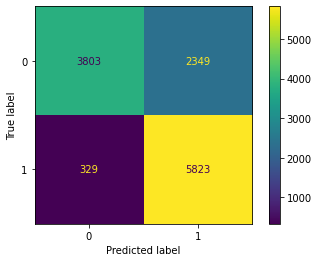

In [ ]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

Experiment With Different Number of Layers



3 Layers instead of 2



In [ ]:
layers_acc = []
layers_f1 = []

In [ ]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 50, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(1, activation='sigmoid'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [ ]:
cnn_trytext.fit(np_train, y_train, validation_data  = (np_val, y_val), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3516 - accuracy: 0.7723 - val_loss: 0.3478 - val_accuracy: 0.7741
Epoch 2/100
1538/1538 [==============================] - 16s 11ms/step - loss: 0.3309 - accuracy: 0.7798 - val_loss: 0.3403 - val_accuracy: 0.7724
Epoch 3/100
1538/1538 [==============================] - 16s 10ms/step - loss: 0.3263 - accuracy: 0.7811 - val_loss: 0.3382 - val_accuracy: 0.7771
Epoch 4/100
1538/1538 [==============================] - 16s 11ms/step - loss: 0.3239 - accuracy: 0.7822 - val_loss: 0.3365 - val_accuracy: 0.7779
Epoch 5/100
1538/1538 [==============================] - 16s 11ms/step - loss: 0.3229 - accuracy: 0.7809 - val_loss: 0.3379 - val_accuracy: 0.7746
Epoch 6/100
1538/1538 [==============================] - 16s 10ms/step - loss: 0.3216 - accuracy: 0.7834 - val_loss: 0.3383 - val_accuracy: 0.7774
Epoch 7/100
1538/1538 [==============================] - 18s 12ms/step - loss: 0.3210 - accuracy: 0.7838 - val_loss: 0

In [ ]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [ ]:
np_preds   = (preds>=0.5).astype(int)

In [ ]:
f1_score(y_test, np_preds)

0.8176322760307003

In [ ]:
accuracy_score(y_test, np_preds)

0.7817782834850455

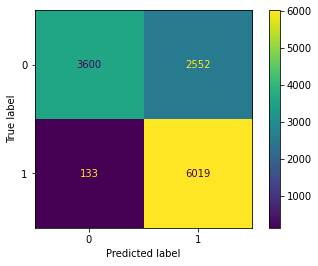

In [ ]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

In [ ]:
layers_acc.append(accuracy_score(y_test, np_preds))
layers_f1.append(f1_score(y_test, np_preds))

4 Layers Architecture

In [ ]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 50, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(1, activation='sigmoid'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [ ]:
cnn_trytext.fit(np_train, y_train, validation_data  = (np_val, y_val), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 19s 12ms/step - loss: 0.3528 - accuracy: 0.7733 - val_loss: 0.3513 - val_accuracy: 0.7706
Epoch 2/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3312 - accuracy: 0.7796 - val_loss: 0.3411 - val_accuracy: 0.7737
Epoch 3/100
1538/1538 [==============================] - 18s 12ms/step - loss: 0.3259 - accuracy: 0.7828 - val_loss: 0.3405 - val_accuracy: 0.7742
Epoch 4/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3236 - accuracy: 0.7821 - val_loss: 0.3391 - val_accuracy: 0.7731
Epoch 5/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3226 - accuracy: 0.7822 - val_loss: 0.3376 - val_accuracy: 0.7713
Epoch 6/100
1538/1538 [==============================] - 18s 12ms/step - loss: 0.3215 - accuracy: 0.7826 - val_loss: 0.3361 - val_accuracy: 0.7751
Epoch 7/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3206 - accuracy: 0.7830 - val_loss: 0

In [ ]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [ ]:
np_preds   = (preds>=0.5).astype(int)

In [ ]:
f1_score(y_test, np_preds)

0.813875262789068

In [ ]:
accuracy_score(y_test, np_preds)

0.7841352405721717

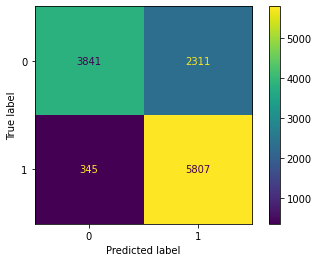

In [ ]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

In [ ]:
layers_acc.append(accuracy_score(y_test, np_preds))
layers_f1.append(f1_score(y_test, np_preds))

In [ ]:
layers_acc.insert(0,0.782)
layers_f1.insert(0,0.812 )

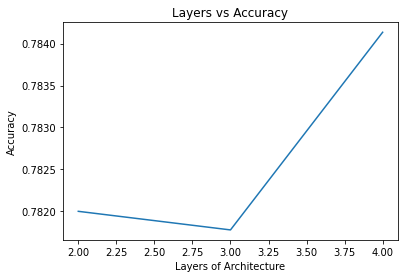

In [ ]:
plt.plot([2,3, 4], layers_acc)
plt.xlabel("Layers of Architecture")
plt.ylabel("Accuracy")
plt.title("Layers vs Accuracy")
plt.show()

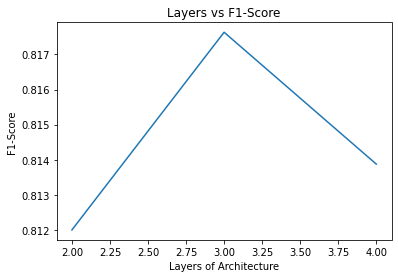

In [ ]:
plt.plot(range(2,5), layers_f1)
plt.xlabel("Layers of Architecture")
plt.ylabel("F1-Score")
plt.title("Layers vs F1-Score")
plt.show()

We have tried a 2 layer, 3 layer, and 4 layer and we see the three layer architecture has higher f1 score, and thus more balanced so we will stick with the three layer architecture and try to change the embedding layer value  

Try different numbers for the embedding vector

Embedding = 100

In [ ]:
embedd_acc = []
embedd_f1 = []

In [ ]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 100, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(1, activation='sigmoid'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [ ]:
cnn_trytext.fit(np_train, y_train, validation_data  = (np_val, y_val), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 20s 13ms/step - loss: 0.3520 - accuracy: 0.7735 - val_loss: 0.3529 - val_accuracy: 0.7715
Epoch 2/100
1538/1538 [==============================] - 20s 13ms/step - loss: 0.3306 - accuracy: 0.7812 - val_loss: 0.3397 - val_accuracy: 0.7737
Epoch 3/100
1538/1538 [==============================] - 20s 13ms/step - loss: 0.3272 - accuracy: 0.7807 - val_loss: 0.3391 - val_accuracy: 0.7705
Epoch 4/100
1538/1538 [==============================] - 19s 12ms/step - loss: 0.3249 - accuracy: 0.7809 - val_loss: 0.3414 - val_accuracy: 0.7701
Epoch 5/100
1538/1538 [==============================] - 19s 12ms/step - loss: 0.3232 - accuracy: 0.7815 - val_loss: 0.3394 - val_accuracy: 0.7763
Epoch 6/100
1538/1538 [==============================] - 20s 13ms/step - loss: 0.3221 - accuracy: 0.7838 - val_loss: 0.3361 - val_accuracy: 0.7739
Epoch 7/100
1538/1538 [==============================] - 20s 13ms/step - loss: 0.3213 - accuracy: 0.7833 - val_loss: 0

In [ ]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [ ]:
np_preds   = (preds>=0.5).astype(int)

In [ ]:
f1_score(y_test, np_preds)

0.8157858801037826

In [ ]:
accuracy_score(y_test, np_preds)

0.7807217165149545

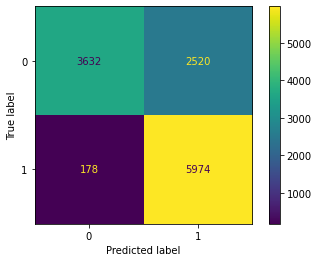

In [ ]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

In [ ]:
embedd_acc.append(accuracy_score(y_test, np_preds))
embedd_f1.append(f1_score(y_test, np_preds))

Embedding = 200

In [ ]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 200, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(1, activation='sigmoid'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [ ]:
cnn_trytext.fit(np_train, y_train, validation_data  = (np_val, y_val), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 28s 17ms/step - loss: 0.3487 - accuracy: 0.7723 - val_loss: 0.3573 - val_accuracy: 0.7707
Epoch 2/100
1538/1538 [==============================] - 26s 17ms/step - loss: 0.3296 - accuracy: 0.7797 - val_loss: 0.3400 - val_accuracy: 0.7719
Epoch 3/100
1538/1538 [==============================] - 26s 17ms/step - loss: 0.3257 - accuracy: 0.7827 - val_loss: 0.3377 - val_accuracy: 0.7703
Epoch 4/100
1538/1538 [==============================] - 25s 17ms/step - loss: 0.3237 - accuracy: 0.7826 - val_loss: 0.3359 - val_accuracy: 0.7707
Epoch 5/100
1538/1538 [==============================] - 25s 16ms/step - loss: 0.3224 - accuracy: 0.7837 - val_loss: 0.3451 - val_accuracy: 0.7750
Epoch 6/100
1538/1538 [==============================] - 25s 16ms/step - loss: 0.3215 - accuracy: 0.7828 - val_loss: 0.3362 - val_accuracy: 0.7754
Epoch 7/100
1538/1538 [==============================] - 26s 17ms/step - loss: 0.3208 - accuracy: 0.7841 - val_loss: 0

In [ ]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [ ]:
np_preds   = (preds>=0.5).astype(int)

In [ ]:
f1_score(y_test, np_preds)

0.813018328803401

In [ ]:
accuracy_score(y_test, np_preds)

0.7819408322496749

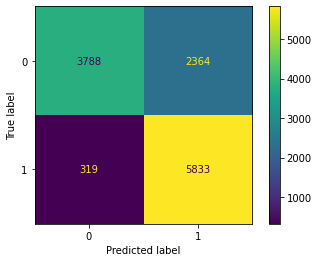

In [ ]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

In [ ]:
embedd_acc.append(accuracy_score(y_test, np_preds))
embedd_f1.append(f1_score(y_test, np_preds))

In [ ]:
embedd_acc.insert(0,0.781)
embedd_f1.insert(0,0.817)

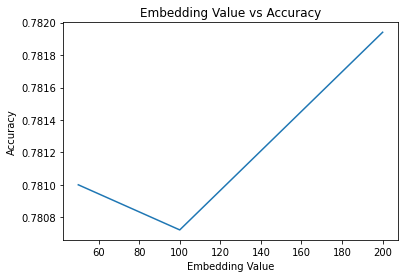

In [ ]:
plt.plot([50,100, 200], embedd_acc)
plt.xlabel("Embedding Value")
plt.ylabel("Accuracy")
plt.title("Embedding Value vs Accuracy")
plt.show()

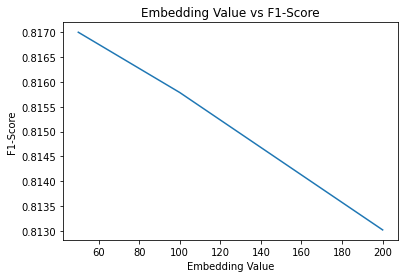

In [ ]:
plt.plot([50,100, 200], embedd_f1)
plt.xlabel("Embedding Value")
plt.ylabel("F1-Score")
plt.title("Embedding Value vs F1-Score")
plt.show()

We see that just like with the layers F1-Score for Embedding = 50 is best from three values, 50, 100, and 200 so we combine both hyperparameters to get highest F1-Score in Next Section

In [12]:
cnn_trytext = keras.Sequential()
cnn_trytext.add(layers.Embedding(500, 50, input_length  = 500))
cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())

cnn_trytext.add(layers.Conv1D(60, 10, activation = 'relu'))
cnn_trytext.add(layers.BatchNormalization())
cnn_trytext.add(layers.MaxPool1D())


cnn_trytext.add(layers.Flatten())
cnn_trytext.add(layers.Dense(30, activation='relu'))

cnn_trytext.add(layers.Dense(1, activation='sigmoid'))
cnn_trytext.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

convergence_callback = EarlyStopping(monitor="val_accuracy",patience = 20, mode="max", restore_best_weights=True)

In [13]:
cnn_trytext.fit(np_train, y_train, validation_data  = (np_val, y_val), epochs=100, batch_size=64, callbacks = [convergence_callback])

Epoch 1/100
1538/1538 [==============================] - 28s 12ms/step - loss: 0.3496 - accuracy: 0.7721 - val_loss: 0.3453 - val_accuracy: 0.7711
Epoch 2/100
1538/1538 [==============================] - 16s 10ms/step - loss: 0.3294 - accuracy: 0.7796 - val_loss: 0.3455 - val_accuracy: 0.7683
Epoch 3/100
1538/1538 [==============================] - 16s 11ms/step - loss: 0.3258 - accuracy: 0.7834 - val_loss: 0.3412 - val_accuracy: 0.7690
Epoch 4/100
1538/1538 [==============================] - 16s 10ms/step - loss: 0.3239 - accuracy: 0.7822 - val_loss: 0.3514 - val_accuracy: 0.7697
Epoch 5/100
1538/1538 [==============================] - 16s 10ms/step - loss: 0.3224 - accuracy: 0.7838 - val_loss: 0.3760 - val_accuracy: 0.7750
Epoch 6/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3217 - accuracy: 0.7846 - val_loss: 0.3456 - val_accuracy: 0.7682
Epoch 7/100
1538/1538 [==============================] - 17s 11ms/step - loss: 0.3212 - accuracy: 0.7821 - val_loss: 0

In [43]:
preds  = cnn_trytext.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [44]:
np_preds   = (preds>=0.5).astype(int)

In [45]:
f1_score(y_test, np_preds)

0.8191251271617498

In [46]:
accuracy_score(y_test, np_preds)

0.78324122236671

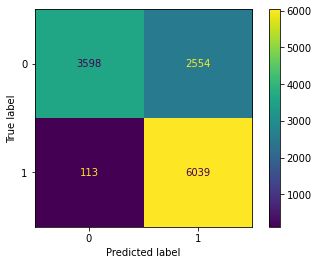

In [47]:
ConfusionMatrixDisplay.from_predictions( y_test, np_preds)

Wehave ensured that our model is good before feeding the features into random forest

Extract Features of the Three layer architecture, and try it with random forest

In [48]:
feature_extractor = keras.Model(cnn_trytext.inputs, cnn_trytext.layers[-2].output)

In [49]:
features = feature_extractor.predict(np_train)

3076/3076 [==============================] - 6s 2ms/step


In [50]:
features.shape

(98432, 30)

In [51]:
classifier = RandomForestClassifier()
classifier.fit(features, y_train)

RandomForestClassifier()

In [52]:
features_test = feature_extractor.predict(np_test)

385/385 [==============================] - 1s 2ms/step


In [53]:
pred_rf = classifier.predict(features_test)

In [54]:
f1_score(y_test, pred_rf)

0.7198351365275631

In [55]:
accuracy_score(y_test, pred_rf)

0.779014954486346

Normalizing TextCNN Features before feeding it into RandomForest

In [56]:
feature_extractor = keras.Model(cnn_trytext.inputs, cnn_trytext.layers[-2].output)

In [57]:
features = feature_extractor.predict(np_train)
features_test = feature_extractor.predict(np_test)


385/385 [==============================] - 1s 2ms/step


In [58]:
scaler = MinMaxScaler()
featres_normalized = scaler.fit_transform(features)
featres_test_normalized = scaler.transform(features_test)

In [60]:
classifier = RandomForestClassifier()
classifier.fit(featres_normalized, y_train)

RandomForestClassifier()

In [61]:
pred_rf_normalize = classifier.predict(featres_test_normalized)

In [62]:
f1_score(y_test, pred_rf_normalize)

0.7196454339311482

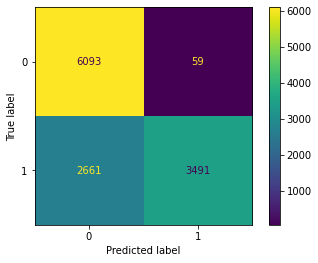

In [63]:
ConfusionMatrixDisplay.from_predictions( y_test, pred_rf_normalize)

We can See that the TextCNN algorithm created a more balanced system due to its ability to get semantic value from the text data but such system is more lenient towards attacks while machine learning created a system that passes no attack but produces a lot of false alarms. 
